# Clustering Models Validation

Origem do dataset: [Kaggle: https://www.kaggle.com/datasets/umerhaddii/big-tech-giants-stock-price-data](https://www.kaggle.com/datasets/umerhaddii/big-tech-giants-stock-price-data)


## Para executar no Google Colab

In [ ]:
# Só precisa ser executado se este notebook for executado no Google Colab
!pip install scikit-learn-extra

## Import das bibliotecas

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Infraestrutura

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. Você está rodando em Python 3.9+
2. Você está usando um ambiente virtual: Virtualenv ou Anaconda
3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
5. Tire um printscreen do ambiente que será usado rodando em sua máquina.
6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

**Dica**: Gere um relatório rico em gráficos que dêem respaldo aos resultados

# Escolha de base de dados
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

In [9]:
# Carregar os dados

# Verifica se existe o arquivo local
url = './data/big_tech_stock_prices.csv'
if not os.path.isfile(url):
  # Caso contrário vai buscar no mwu github publico
  url = 'https://raw.githubusercontent.com/edermartins/ia-lab/refs/heads/main/clustering/data/Country-data.csv'

In [26]:
# Carregando os dados
df = pd.read_csv(url)
# Selecionando as colunas relevantes para o agrupamento
X = df[['open', 'high', 'low', 'close', 'adj_close', 'volume']]
# Filtrando somente as ações do Google para critério de comparação com o todo
stock_google = df[df['stock_symbol'] == 'GOOGL']
X_google = stock_google[['open', 'high', 'low', 'close', 'adj_close', 'volume']]

In [11]:
# Normalização dos dados para a clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Analisando os dados

### Visualizando algumas informações do Dataset

In [12]:
# Verificando campos nulos
df.isna().sum()

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

In [13]:
# Mostra as primeiras linhas do dataset original
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [14]:
# Tamanho do dataset
df.shape

(45088, 8)

In [16]:
# Exibindo o dataset normalizado
X_scaled

array([[-0.80337928, -0.80300162, -0.80427771, -0.80349104, -0.7791924 ,
         4.7267468 ],
       [-0.8029681 , -0.80262367, -0.80396738, -0.80336096, -0.77908088,
         5.88684907],
       [-0.80304541, -0.8027485 , -0.80485913, -0.80455973, -0.78010878,
         5.35337138],
       ...,
       [ 0.27781733,  0.28446789,  0.20622647,  0.19518006,  0.23655036,
         1.66939957],
       [ 0.20746118,  0.25145815,  0.20103283,  0.23071444,  0.27229476,
         1.8026714 ],
       [ 0.30625497,  0.32233201,  0.29351883,  0.32038705,  0.3624974 ,
         1.81181708]])

In [17]:
# Quantidade de séries no dataset
num_stocks = df['stock_symbol'].nunique()
print(f"Total de empresas com ações: {num_stocks}")

Total de empresas com ações: 14


In [18]:
# Mostrar estatísticas descritivas para entender a faixa dinâmica das variáveis
df.describe()

,open,high,low,close,adj_close,volume
count,45088.000000,45088.000000,45088.000000,45088.000000,45088.000000,4.508800e+04
mean,89.266584,90.369825,88.111930,89.271306,85.209631,5.297813e+07
std,101.626955,103.001073,100.124399,101.592916,100.995967,9.324730e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,25.670000,25.930135,25.360001,25.660000,22.076433,9.629425e+06
50%,47.930000,48.459999,47.465000,47.970001,45.377333,2.646315e+07
75%,128.662502,129.848900,127.253945,128.640609,113.672460,5.839768e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


In [21]:
# Verificando campos duplicados e analisando a estrutura do dataset
print("Quantidade de campos duplicados:", df.duplicated().sum())
df.info()

Quantidade de campos duplicados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


### Análise Exploratória

#### Variáveis de Interesse

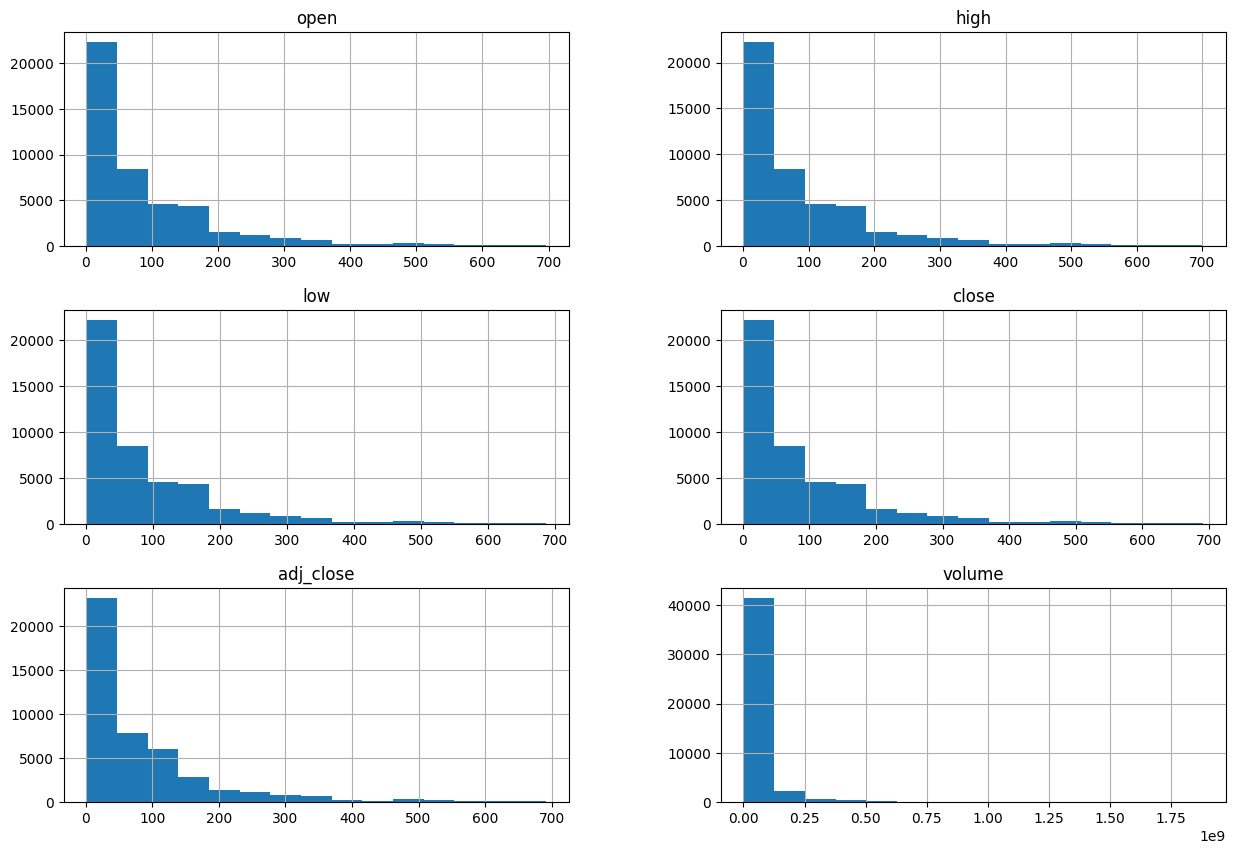

In [20]:
# Visualizando as variáveis de interesse
X.hist(bins=15, figsize=(15, 10))
plt.show()

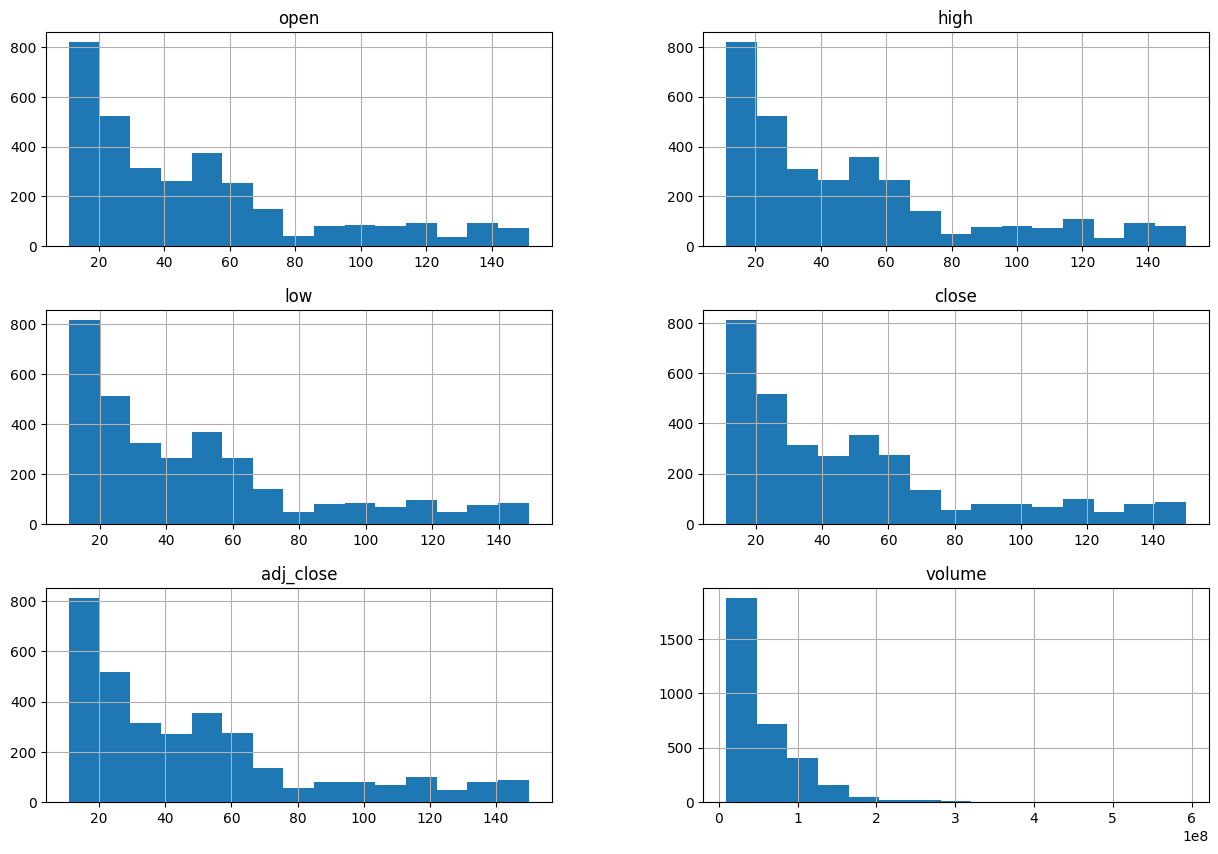

In [28]:
# Visualizando as variáveis do Google para comparar com o todo (o gráfico acima)
X_google.hist(bins=15, figsize=(15, 10))
plt.show()

# Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
   * K-Médias
   * DBScan
2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.
3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.
5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

## K-Médias

Com o gráfico do índice de silhueta, podemos identificar o número de clusters que maximiza a pontuação, sendo este o valor ótimo.

O K-Means requer a especificação do número de clusters, por isso vamos usar o índice de silhueta para encontrar o número ótimo de clusters:

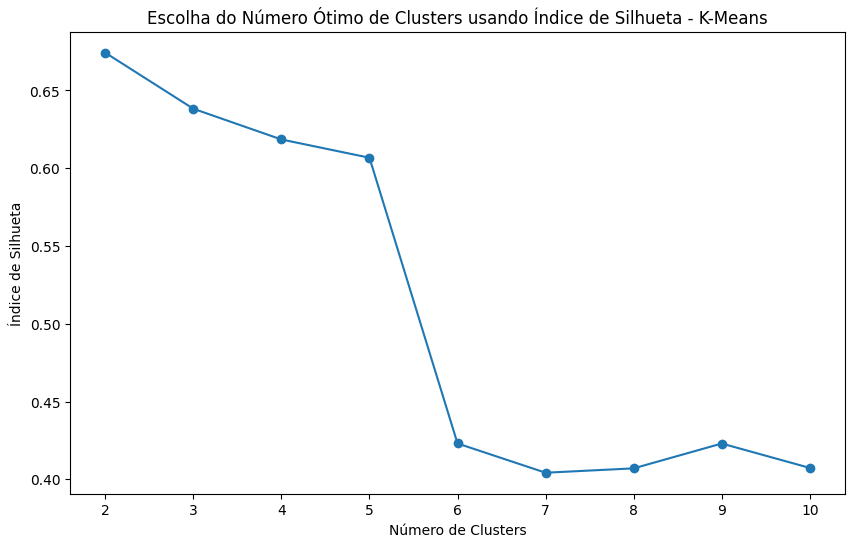

In [29]:
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o índice de silhueta para cada número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Escolha do Número Ótimo de Clusters usando Índice de Silhueta - K-Means')
plt.show()


## DBScan

O DBSCAN é um algoritmo baseado em densidade, portanto não necessita do número de clusters como parâmetro. Em vez disso, ele utiliza eps (raio de vizinhança) e min_samples (número mínimo de pontos em uma vizinhança). Vamos ajustar esses parâmetros e calcular o índice de silhueta:

In [36]:
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filtrar clusters válidos
valid_labels = dbscan_labels != -1  # -1 são pontos considerados como ruído
silhouette_avg_dbscan = silhouette_score(X_scaled[valid_labels], dbscan_labels[valid_labels])

print(f"Índice de Silhueta para DBSCAN: {silhouette_avg_dbscan}")

Índice de Silhueta para DBSCAN: 0.1417298902666347


## Outras Medidas de Validação
Vamos agora utilizar outras duas medidas de validação para comparar os algoritmos: Davies-Bouldin Score e Calinski-Harabasz Score.

### Davies-Bouldin Score

In [ ]:
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}")

davies_bouldin_dbscan = davies_bouldin_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Davies-Bouldin Score para DBSCAN: {davies_bouldin_dbscan}")

O Davies-Bouldin Score é uma métrica de similaridade onde valores menores indicam melhor separação entre clusters.

### Calinski-Harabasz Score

In [ ]:
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Score para K-Means: {calinski_harabasz_kmeans}")

calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Calinski-Harabasz Score para DBSCAN: {calinski_harabasz_dbscan}")


O Calinski-Harabasz Score mede a razão entre a dispersão entre clusters e a dispersão intra-cluster. Valores maiores indicam agrupamentos mais compactos e bem separados.

## Análise dos Resultados
* **Silhueta**: Para o K-Means, conseguimos definir o número ótimo de clusters, enquanto para o DBSCAN, o índice é menos efetivo devido à presença de ruídos.
* **Davies-Bouldin Score**: Mostra que o DBSCAN pode ter maior separação para clusters densos, enquanto o K-Means é geralmente menor para clusters globulares.
* **Calinski-Harabasz Score**: Ajuda a comparar a compactação e separação dos clusters. O valor maior para um dos algoritmos indicará melhor separação e menor sobreposição.

Conclusão sobre o Índice de Silhueta e DBSCAN
O **índice de silhueta** não é ideal para o **DBSCAN** devido à maneira como o DBSCAN trata pontos como ruídos e cria clusters com formas arbitrárias. O índice de silhueta assume clusters bem definidos e esféricos, o que não se aplica bem ao DBSCAN. Assim, para avaliar o DBSCAN, métricas como o Davies-Bouldin Score ou a análise de densidade são geralmente mais indicadas, pois consideram a distribuição dos dados e não requerem que todos os pontos pertençam a um cluster.

## Comparação dos Resultados: K-Means vs. DBSCAN
* O índice de silhueta mede a coesão e separação dos clusters. Quanto maior o valor, melhor o agrupamento.
* Para o K-Means, o índice de silhueta nos ajudou a definir o número ótimo de clusters, que podemos justificar escolhendo o número que maximiza essa métrica.
* No caso do DBSCAN, aplicamos o índice de silhueta apenas aos pontos classificados (excluindo o ruído). DBSCAN é menos eficiente para índices de silhueta, já que esta métrica assume que todos os pontos estão associados a um cluster.

Podemos observar que:
* K-Means cria clusters esféricos, o que pode ser ideal para o índice de silhueta, enquanto DBSCAN é mais adequado para dados com formas arbitrárias.
* DBSCAN pode identificar pontos de ruído, o que o diferencia do K-Means.

# Medidas de similaridade

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.
2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.
3. Indique um caso de uso para essa solução projetada.
4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

### Método do Cotovelo

#### K-Média

In [ ]:
# Aplicando o Método do cotovelo (Elbow Method) > K-Média
elbow_graph=[]
for i in range(1,11):
    kmeans_result=KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans_result.fit(X_vars)
    elbow_graph.append(kmeans_result.inertia_)
plt.plot(range(1, 11), elbow_graph)
plt.title('Método do cotovelo (Elbow Method) > K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

#### K-Medoides

In [ ]:
# Aplicando o Método do cotovelo (Elbow Method) > K-Medoide
elbow_graph=[]
for i in range(1,11):
    kMedoids_result=KMedoids(n_clusters=i, init='k-medoids++', random_state= 42)
    kMedoids_result.fit_predict(X_vars)
    elbow_graph.append(kMedoids_result.inertia_)
plt.plot(range(1, 11), elbow_graph)
plt.title('Método do cotovelo (Elbow Method) > K-Medoides')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Parte 3 Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
   * K-Médias

In [ ]:
# K-Médias
kmeans_result = KMeans(n_clusters=3, random_state=42)
y_vars = kmeans_result.fit_predict(df_scaled)
X_vars_kmeans = X_vars.copy()
X_vars_kmeans['Cluster_KMeans'] = kmeans_result.labels_

In [ ]:
# Analisando a distribuição dos clusters (K-Médias)
cluster_counts = X_vars_kmeans['Cluster_KMeans'].value_counts()
print("Distribuição dos clusters (K-Médias):")
print(cluster_counts)

In [ ]:
# Analisando a distribuição das dimensões em cada grupo (K-Médias)
cluster_means = X_vars_kmeans.groupby('Cluster_KMeans').mean()
print("Distribuição das dimensões em cada grupo (K-Médias):")
print(cluster_means)

   * Clusterização Hierárquica

In [ ]:
# Clusterização Hierárquica através da função scipy.cluster.hierarchy.linkage do SciPy
linked = linkage(df_scaled, method='ward')

2. Para os resultados, do K-Médias:
    * Interprete cada um dos clusters obtidos citando:
        * Qual a distribuição das dimensões em cada grupo

In [ ]:
# Analisando a distribuição das dimensões em cada grupo (K-Médias)
cluster_means = X_vars_kmeans.groupby('Cluster_KMeans').mean()
print("Distribuição das dimensões em cada grupo (K-Médias):")
print(cluster_means)

* O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
   > ```
   > Cluster 0 é melhor representado por: Suriname
   > Cluster 1 é melhor representado por: Iceland
   > Cluster 2 é melhor representado por: Guinea
   > ```
   > _________
   > O país que melhor representa o seu agrupamento é aquela mais próximo do centroid, praticamente os demais ficam agrupados em torno dele.

In [ ]:
# Exibir os países que representam cada cluster (K-Médias)
def calcular_pais_representativo(cluster_num, df, df_scaled, kmeans):
    # Gera um índice do cluster n
    cluster_indices = df[X_vars_kmeans['Cluster_KMeans'] == cluster_num].index
    # Resupera o elementro central de cada cluster, procurando o mais próximo através da distãncia do centro
    cluster_center = kmeans_result.cluster_centers_[cluster_num]
    distancias = np.linalg.norm(df_scaled[cluster_indices] - cluster_center, axis=1)
    pais_representativo_idx = cluster_indices[np.argmin(distancias)]
    return df.loc[pais_representativo_idx, 'country']

for cluster_num in range(3):
    pais_representativo = calcular_pais_representativo(cluster_num, df, df_scaled, kmeans_result)
    print(f"Cluster {cluster_num} é melhor representado por: {pais_representativo}")

3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

In [ ]:
# Dendograma
plt.figure(figsize=(45, 14))
plt.rcParams.update({'font.size': 30})
dendrogram(linked, labels=df['country'].values, leaf_rotation=90, leaf_font_size=14)
plt.title('Dendograma da Clusterização Hierárquica', fontsize=30)
plt.xlabel('Países', fontsize=30)
plt.ylabel('Distância Euclidiana', fontsize=30)
plt.show()

4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
   > Percebi que na clusterização hierárquica, usando o dendrograma, consigo uma relação visual da hierárquia entre os países. O que não foi possível no cado no K-Média, já que o problema tem mais que 2 dimensões (eu até exibi ao final deste trabalho duas delas, mas é uma visão pobre de um problema muito maior.
   > 
   > Percebi que usando K-Médias eu tive que escolher a quantidade de grupos (clusters), apesar de existirem técnicas para ser mais acertivo nesta escolha. Outro ponto importante é que o K-Média, por se tratar de médias, é sensível a outliers (valores atípicos ou errados que causem desvios no cácula da média).
   >
   > Já na hierárquica, não é nessário escolher a quantidade de grupos e ela é menos sesível a outliers. Apesar de permitir a visualização, isso só é possível com poucos dados.
   >
   > Baseado nisso, acredito que o uso de K-Média é mais indicado quando sabemos a quantidade de grupos ou ele pode ser estimado. Por entregar uma matriz com os dados, é mais poderosa para análises mais complexas.

# Parte 4 Escolha de algoritmos
1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
> * Inicialização dos centróides.
> * Atribuição de cada ponto ao centróide mais próximo.
> * Recalcular a posição dos centróides.
> * Repetir até a convergência (quando a mudança dos centróides entre iterações for nula ou mínima, dentro de um parâmetro previamente estabelecido).

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [ ]:
# Medóide
kmedoids = KMedoids(n_clusters=3, random_state=42)
y_vars_m = kmedoids.fit_predict(df_scaled)
X_vars['Cluster_Medoid'] = kmedoids.labels_

In [ ]:
# Analisando a distribuição dos clusters (K-Medoides)
cluster_counts = X_vars['Cluster_Medoid'].value_counts()
print("Distribuição dos clusters (K-Medóide):")
print(cluster_counts)

In [ ]:
# Analisando a distribuição das dimensões em cada grupo (K-Medoides)
cluster_means = X_vars.groupby('Cluster_Medoid').mean()
print("Distribuição das dimensões em cada grupo (K-Medóide):")
print(cluster_means)

3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
> O K-Médias é sensível a outliers porque os centróides são afetados por valores extremos, o que pode distorcer a posição dos clusters, já que utiliza médias

4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?
> O algoritmo DBScan é mais robusto porque é baseado em densidade. Desta forma, pontos que não pertencem a regiões densas são automaticamente classificados como ruídos, ficando gora dos grupos. Por esse motivo é um ótimo algorítimo a ser usado quando outliers não são tão claros ou difíceis de serem removidos.

# Gráficos extras
## K-Médias

In [ ]:
# Visualizando o resultado do K-Média
X = df_scaled
plt.scatter(X[y_vars == 0, 0], X[y_vars == 0, 4], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_vars == 1, 0], X[y_vars == 1, 4], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_vars == 2, 0], X[y_vars == 2, 4], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 2], s = 300, c = 'black', label = 'Centroid') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Média - Clusters (base normalizada)')
plt.xlabel('Motalidade infantil')
plt.ylabel('Renda anual')
plt.legend()
plt.show()

## K-Medoides

In [ ]:
# Visualizando o resultado
X = df_scaled
plt.scatter(X[y_vars_m == 0, 0], X[y_vars_m == 0, 4], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_vars_m == 1, 0], X[y_vars_m == 1, 4], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_vars_m == 2, 0], X[y_vars_m == 2, 4], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 2], s = 300, c = 'black', label = 'Medoide') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Medoide - Clusters (base normalizada)')
plt.xlabel('Motalidade infantil')
plt.ylabel('Renda anual')
plt.legend()
plt.show()

# DbScan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Substitua 'seu_dataset.csv' pelo caminho do seu arquivo
data = df.copy()

# Selecionar as features numéricas
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = data[features]

# Adicionar a coluna de clusters ao DataFrame original
data['cluster'] = clusters

# Definir os parâmetros do DBSCAN (eps e min_samples)
# A escolha desses parâmetros é crucial e pode exigir ajuste fino
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Visualizar os clusters em um gráfico de dispersão
plt.scatter(data['child_mort'], data['income'], c=data['cluster'], cmap='viridis')
plt.xlabel('Mortalidade Infantil')
plt.ylabel('Renda')
plt.title('Clusterização DBSCAN')
plt.show()

# Por: `Eder Martins`

## Obrigado!